In [245]:
#Import the necessary library

In [246]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import MaxPooling2D, Convolution2D, Dense, Flatten, Conv2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

In [247]:
#load data from the keras library
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [248]:
#check the shape of x train dataset
x_train.shape

(60000, 28, 28)

In [249]:
#check the shape of x test dataset
x_test.shape

(10000, 28, 28)

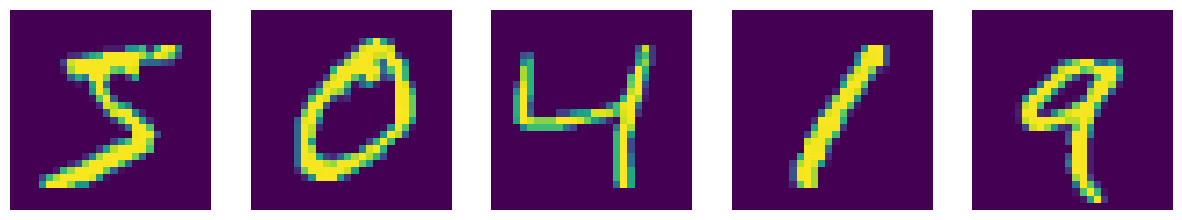

In [251]:
#plot graph to show a sample of your dataset
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axs[i].imshow(x_train[i])
    axs[i].axis('off')
plt.show()

### Pre-Process the Image

In [252]:
#reshape your xtrain and xtest 
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))

In [253]:
#check th shape
x_train.shape

(60000, 28, 28, 1)

In [254]:
#covert your y test and y train to categorical variable
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Implement your CNN Model

The CNN model was implemented using 3 convolutional blocks 
filter of 32,64,64 in each convolutional block

In [193]:
#declare your model
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

#add second convo block
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

#add third convo block
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# add the flaten and  dense layer
cnn_model.add(Flatten())
cnn_model.add(Dense(64,activation = 'relu'))
cnn_model.add(Dense(10,activation = 'softmax'))

#get your model summary
cnn_model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_79 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_71 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_80 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 1, 1, 64)       

In [194]:
#compile your model
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [196]:
#fit the model and get prediction
modeloutput = cnn_model.fit(x_train,y_train, batch_size = 64, validation_split = 0.2, epochs = 10)

Epoch 1/10
750/750 [==============================] - 20s 27ms/step - loss: 0.0279 - accuracy: 0.9912 - val_loss: 0.0648 - val_accuracy: 0.9842
Epoch 2/10
750/750 [==============================] - 22s 29ms/step - loss: 0.0244 - accuracy: 0.9915 - val_loss: 0.0712 - val_accuracy: 0.9841
Epoch 3/10
750/750 [==============================] - 24s 32ms/step - loss: 0.0240 - accuracy: 0.9920 - val_loss: 0.0794 - val_accuracy: 0.9814
Epoch 4/10
750/750 [==============================] - 23s 31ms/step - loss: 0.0202 - accuracy: 0.9935 - val_loss: 0.0685 - val_accuracy: 0.9850
Epoch 5/10
750/750 [==============================] - 24s 32ms/step - loss: 0.0216 - accuracy: 0.9936 - val_loss: 0.0917 - val_accuracy: 0.9800
Epoch 6/10
750/750 [==============================] - 24s 32ms/step - loss: 0.0211 - accuracy: 0.9930 - val_loss: 0.0875 - val_accuracy: 0.9816
Epoch 7/10
750/750 [==============================] - 23s 31ms/step - loss: 0.0172 - accuracy: 0.9943 - val_loss: 0.1006 - val_accuracy:

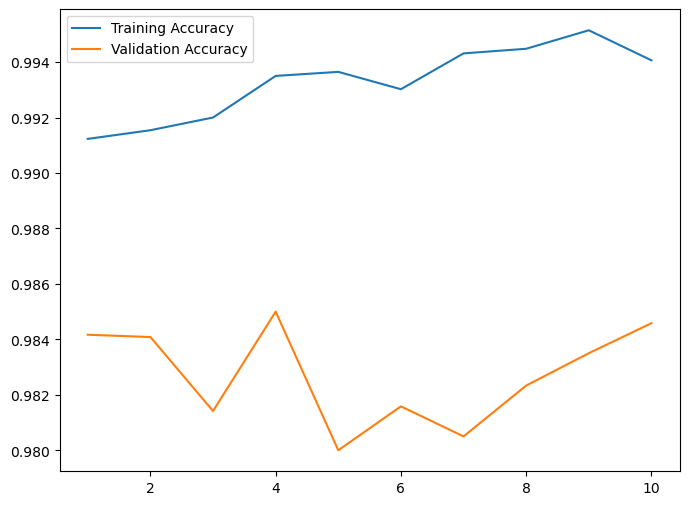

In [197]:
#plot a graph of training accuracy and validation accuracy
acc = modeloutput.history['accuracy']
val_acc = modeloutput.history['val_accuracy']
epoch = range(1, len(acc) + 1)

plt.figure(figsize=(8,6))
plt.plot(epoch, acc, label='Training Accuracy')
plt.plot(epoch, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'best')

# plt.xlabel('Epochs')
# plt.ylabel('Loss')

# #Shows the legend of the plot with the labels of the two lines.
# plt.legend()

#Shows the plot on the screen.
plt.show()

In [198]:
# evaluate your model
loss, accuracy = cnn_model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0880 - accuracy: 0.9851


### Implement your CNN Model

The CNN model was implemented using 3 convolutional blocks 
filter of 64,128,128 in each convolutional block

In [199]:
filter_cnn_model = Sequential()
filter_cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu'))
filter_cnn_model.add(MaxPooling2D(pool_size=(2,2)))

filter_cnn_model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
filter_cnn_model.add(MaxPooling2D(pool_size=(2,2)))

filter_cnn_model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
filter_cnn_model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())

filter_cnn_model.add(Flatten())
filter_cnn_model.add(Dense(64,activation = 'relu'))
#model.add(Dropout(0.5))
filter_cnn_model.add(Dense(10,activation = 'softmax'))

filter_cnn_model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_81 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_82 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_74 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_83 (Conv2D)          (None, 3, 3, 128)         147584    
                                                                 
 max_pooling2d_75 (MaxPoolin  (None, 1, 1, 128)      

In [200]:
filter_cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [201]:
filter_modeloutput = cnn_model.fit(x_train,y_train, batch_size = 64, validation_split = 0.2, epochs = 10)

Epoch 1/10
750/750 [==============================] - 25s 33ms/step - loss: 0.0104 - accuracy: 0.9969 - val_loss: 0.0935 - val_accuracy: 0.9843
Epoch 2/10
750/750 [==============================] - 25s 33ms/step - loss: 0.0141 - accuracy: 0.9958 - val_loss: 0.0979 - val_accuracy: 0.9847
Epoch 3/10
750/750 [==============================] - 26s 35ms/step - loss: 0.0123 - accuracy: 0.9964 - val_loss: 0.1107 - val_accuracy: 0.9812
Epoch 4/10
750/750 [==============================] - 25s 34ms/step - loss: 0.0127 - accuracy: 0.9965 - val_loss: 0.0909 - val_accuracy: 0.9841
Epoch 5/10
750/750 [==============================] - 25s 33ms/step - loss: 0.0157 - accuracy: 0.9956 - val_loss: 0.1073 - val_accuracy: 0.9816
Epoch 6/10
750/750 [==============================] - 25s 33ms/step - loss: 0.0123 - accuracy: 0.9966 - val_loss: 0.1085 - val_accuracy: 0.9840
Epoch 7/10
750/750 [==============================] - 24s 32ms/step - loss: 0.0132 - accuracy: 0.9962 - val_loss: 0.1127 - val_accuracy:

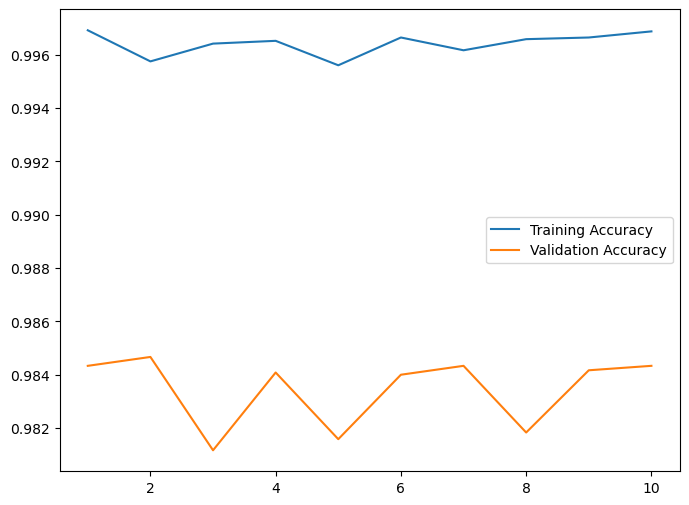

In [202]:
accuracy = filter_modeloutput.history['accuracy']
val_accuracy = filter_modeloutput.history['val_accuracy']
epoch = range(1, len(accuracy) + 1)

plt.figure(figsize=(8,6))
plt.plot(epoch, accuracy, label='Training Accuracy')
plt.plot(epoch, val_accuracy, label = 'Validation Accuracy')
plt.legend(loc = 'best')
plt.show()

In [203]:
loss, accuracy = filter_cnn_model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 26.3610 - accuracy: 0.0843


### Implement your CNN Model

The CNN model was implemented using 3 convolutional blocks 
filter of 32,64,128 in each convolutional block

In [204]:
filters_cnn_model = Sequential()
filters_cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu'))
filters_cnn_model.add(MaxPooling2D(pool_size=(2,2)))

filters_cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
filters_cnn_model.add(MaxPooling2D(pool_size=(2,2)))

filters_cnn_model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
filters_cnn_model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())

filters_cnn_model.add(Flatten())
filters_cnn_model.add(Dense(64,activation = 'relu'))
#model.add(Dropout(0.5))
filters_cnn_model.add(Dense(10,activation = 'softmax'))

filters_cnn_model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_84 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_85 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_77 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_86 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_78 (MaxPoolin  (None, 1, 1, 128)      

In [205]:
filters_cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [206]:
filters_modeloutput = cnn_model.fit(x_train,y_train, batch_size = 64, validation_split = 0.2, epochs = 10)

Epoch 1/10
750/750 [==============================] - 24s 33ms/step - loss: 0.0134 - accuracy: 0.9961 - val_loss: 0.1192 - val_accuracy: 0.9827
Epoch 2/10
750/750 [==============================] - 25s 34ms/step - loss: 0.0143 - accuracy: 0.9960 - val_loss: 0.1504 - val_accuracy: 0.9797
Epoch 3/10
750/750 [==============================] - 24s 32ms/step - loss: 0.0093 - accuracy: 0.9973 - val_loss: 0.1027 - val_accuracy: 0.9851
Epoch 4/10
750/750 [==============================] - 24s 32ms/step - loss: 0.0129 - accuracy: 0.9965 - val_loss: 0.1426 - val_accuracy: 0.9846
Epoch 5/10
750/750 [==============================] - 26s 35ms/step - loss: 0.0129 - accuracy: 0.9965 - val_loss: 0.1285 - val_accuracy: 0.9830
Epoch 6/10
750/750 [==============================] - 26s 34ms/step - loss: 0.0120 - accuracy: 0.9971 - val_loss: 0.1056 - val_accuracy: 0.9862
Epoch 7/10
750/750 [==============================] - 25s 33ms/step - loss: 0.0098 - accuracy: 0.9971 - val_loss: 0.1301 - val_accuracy:

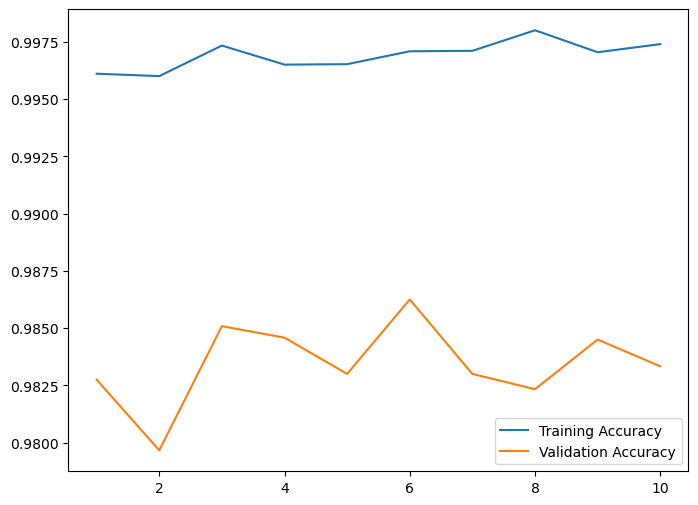

In [207]:
accuracy = filters_modeloutput.history['accuracy']
val_accuracy = filters_modeloutput.history['val_accuracy']
epoch = range(1, len(accuracy) + 1)

plt.figure(figsize=(8,6))
plt.plot(epoch, accuracy, label='Training Accuracy')
plt.plot(epoch, val_accuracy, label = 'Validation Accuracy')
plt.legend(loc = 'best')

# plt.xlabel('Epochs')
# plt.ylabel('Loss')

# #Shows the legend of the plot with the labels of the two lines.
# plt.legend()

#Shows the plot on the screen.
plt.show()

In [208]:
loss, accuracy = filters_cnn_model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 21.6534 - accuracy: 0.0989


### Implement the CNN Model with vayrying number of convolutional blocks

The CNN model was implemented using 3 convolutional blocks 

In [209]:
#Using 3 Convolution Block

con_cnn_model = Sequential()
con_cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu'))
con_cnn_model.add(MaxPooling2D(pool_size=(2,2)))

con_cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu'))
con_cnn_model.add(MaxPooling2D(pool_size=(2,2)))

con_cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
con_cnn_model.add(MaxPooling2D(pool_size=(2,2)))


con_cnn_model.add(Flatten())
con_cnn_model.add(Dense(64,activation = 'relu'))
#model.add(Dropout(0.5))
con_cnn_model.add(Dense(10,activation = 'softmax')) 

con_cnn_model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_87 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_79 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_88 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_80 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_89 (Conv2D)          (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_81 (MaxPoolin  (None, 1, 1, 64)       

In [210]:
con_cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
con_modeloutput = con_cnn_model.fit(x_train,y_train, batch_size = 64, validation_split = 0.2, epochs = 7)

Epoch 1/7
750/750 [==============================] - 20s 26ms/step - loss: 0.4625 - accuracy: 0.8834 - val_loss: 0.1271 - val_accuracy: 0.9610
Epoch 2/7
750/750 [==============================] - 19s 26ms/step - loss: 0.1073 - accuracy: 0.9674 - val_loss: 0.0922 - val_accuracy: 0.9724
Epoch 3/7
750/750 [==============================] - 20s 27ms/step - loss: 0.0786 - accuracy: 0.9748 - val_loss: 0.1025 - val_accuracy: 0.9709
Epoch 4/7
750/750 [==============================] - 20s 27ms/step - loss: 0.0637 - accuracy: 0.9799 - val_loss: 0.0704 - val_accuracy: 0.9797
Epoch 5/7
750/750 [==============================] - 20s 27ms/step - loss: 0.0535 - accuracy: 0.9832 - val_loss: 0.0638 - val_accuracy: 0.9831
Epoch 6/7
750/750 [==============================] - 19s 25ms/step - loss: 0.0450 - accuracy: 0.9861 - val_loss: 0.0915 - val_accuracy: 0.9726
Epoch 7/7
750/750 [==============================] - 19s 26ms/step - loss: 0.0432 - accuracy: 0.9861 - val_loss: 0.0705 - val_accuracy: 0.9790

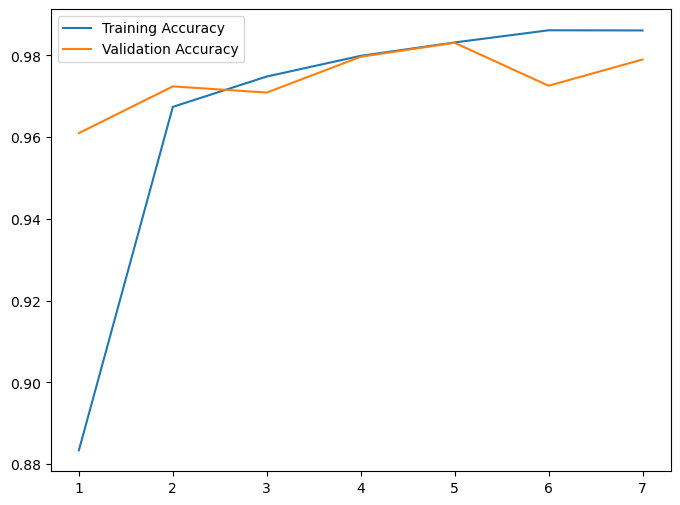

In [211]:
accuracy = con_modeloutput.history['accuracy']
val_accuracy = con_modeloutput.history['val_accuracy']
epoch = range(1, len(accuracy) + 1)

plt.figure(figsize=(8,6))
plt.plot(epoch, accuracy, label='Training Accuracy')
plt.plot(epoch, val_accuracy, label = 'Validation Accuracy')
plt.legend(loc = 'best')

# plt.xlabel('Epochs')
# plt.ylabel('Loss')

# #Shows the legend of the plot with the labels of the two lines.
# plt.legend()

#Shows the plot on the screen.
plt.show()

In [212]:
loss, accuracy = con_cnn_model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0807 - accuracy: 0.9776


### Implement the CNN Model with vayrying number of convolutional blocks

The CNN model was implemented using 2 convolutional blocks

In [213]:
## Usiing 2 convolution bloc;

conv_cnn_model = Sequential()
conv_cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu'))
conv_cnn_model.add(MaxPooling2D(pool_size=(2,2)))

conv_cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu'))
conv_cnn_model.add(MaxPooling2D(pool_size=(2,2)))


conv_cnn_model.add(Flatten())
conv_cnn_model.add(Dense(64,activation = 'relu'))
#model.add(Dropout(0.5))
conv_cnn_model.add(Dense(10,activation = 'softmax'))

conv_cnn_model.summary()


Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_90 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_82 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_91 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_83 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 800)               0         
                                                                 
 dense_42 (Dense)            (None, 64)              

In [214]:
conv_cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [215]:
conv_modeloutput = conv_cnn_model.fit(x_train,y_train, batch_size = 64, validation_split = 0.2, epochs = 7)

Epoch 1/7
750/750 [==============================] - 21s 27ms/step - loss: 0.5907 - accuracy: 0.9112 - val_loss: 0.1216 - val_accuracy: 0.9654
Epoch 2/7
750/750 [==============================] - 19s 26ms/step - loss: 0.0855 - accuracy: 0.9746 - val_loss: 0.0813 - val_accuracy: 0.9753
Epoch 3/7
750/750 [==============================] - 19s 26ms/step - loss: 0.0620 - accuracy: 0.9812 - val_loss: 0.0605 - val_accuracy: 0.9827
Epoch 4/7
750/750 [==============================] - 19s 25ms/step - loss: 0.0465 - accuracy: 0.9862 - val_loss: 0.0804 - val_accuracy: 0.9779
Epoch 5/7
750/750 [==============================] - 20s 27ms/step - loss: 0.0404 - accuracy: 0.9874 - val_loss: 0.0718 - val_accuracy: 0.9813
Epoch 6/7
750/750 [==============================] - 19s 26ms/step - loss: 0.0331 - accuracy: 0.9892 - val_loss: 0.0587 - val_accuracy: 0.9843
Epoch 7/7
750/750 [==============================] - 20s 27ms/step - loss: 0.0296 - accuracy: 0.9909 - val_loss: 0.0636 - val_accuracy: 0.9834

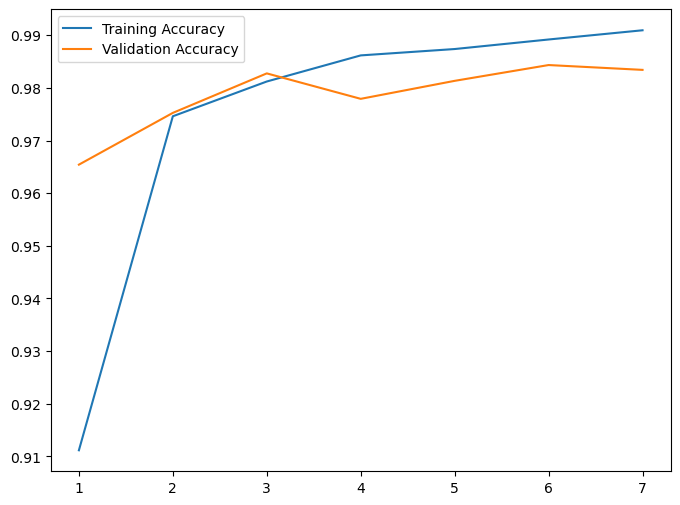

In [216]:
accuracy = conv_modeloutput.history['accuracy']
val_accuracy = conv_modeloutput.history['val_accuracy']
epoch = range(1, len(accuracy) + 1)

plt.figure(figsize=(8,6))
plt.plot(epoch, accuracy, label='Training Accuracy')
plt.plot(epoch, val_accuracy, label = 'Validation Accuracy')
plt.legend(loc = 'best')

# plt.xlabel('Epochs')
# plt.ylabel('Loss')

# #Shows the legend of the plot with the labels of the two lines.
# plt.legend()

#Shows the plot on the screen.
plt.show()

In [221]:
loss, accuracy = conv_cnn_model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0503 - accuracy: 0.9865


### Implement the CNN Model with varying Learning Rate

The CNN model was implemented using Adam and learning rate of 0.001

In [223]:
### using a learning rate of o.001
ler_cnn_model = Sequential()
ler_cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu'))
ler_cnn_model.add(MaxPooling2D(pool_size=(2,2)))

ler_cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu'))
ler_cnn_model.add(MaxPooling2D(pool_size=(2,2)))

ler_cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
ler_cnn_model.add(MaxPooling2D(pool_size=(2,2)))


ler_cnn_model.add(Flatten())
ler_cnn_model.add(Dense(64,activation = 'relu'))
#model.add(Dropout(0.5))
ler_cnn_model.add(Dense(10,activation = 'softmax'))

ler_cnn_model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_96 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_87 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_97 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_88 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_98 (Conv2D)          (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_89 (MaxPoolin  (None, 1, 1, 64)       

In [224]:
ler_cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [225]:
ler_modeloutput = ler_cnn_model.fit(x_train,y_train, batch_size = 64, validation_split = 0.2, epochs = 7)

Epoch 1/7
750/750 [==============================] - 17s 21ms/step - loss: 0.3698 - accuracy: 0.8993 - val_loss: 0.1293 - val_accuracy: 0.9612
Epoch 2/7
750/750 [==============================] - 16s 21ms/step - loss: 0.1067 - accuracy: 0.9676 - val_loss: 0.0785 - val_accuracy: 0.9765
Epoch 3/7
750/750 [==============================] - 18s 24ms/step - loss: 0.0762 - accuracy: 0.9758 - val_loss: 0.0811 - val_accuracy: 0.9764
Epoch 4/7
750/750 [==============================] - 18s 24ms/step - loss: 0.0624 - accuracy: 0.9801 - val_loss: 0.0698 - val_accuracy: 0.9787
Epoch 5/7
750/750 [==============================] - 18s 24ms/step - loss: 0.0527 - accuracy: 0.9833 - val_loss: 0.0736 - val_accuracy: 0.9796
Epoch 6/7
750/750 [==============================] - 19s 25ms/step - loss: 0.0469 - accuracy: 0.9850 - val_loss: 0.0733 - val_accuracy: 0.9797
Epoch 7/7
750/750 [==============================] - 18s 24ms/step - loss: 0.0436 - accuracy: 0.9863 - val_loss: 0.0797 - val_accuracy: 0.9787

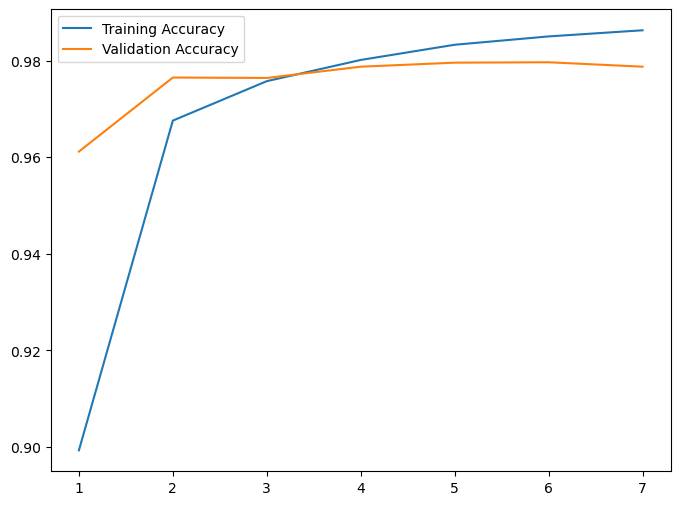

In [226]:
accuracy = ler_modeloutput.history['accuracy']
val_accuracy = ler_modeloutput.history['val_accuracy']
epoch = range(1, len(accuracy) + 1)

plt.figure(figsize=(8,6))
plt.plot(epoch, accuracy, label='Training Accuracy')
plt.plot(epoch, val_accuracy, label = 'Validation Accuracy')
plt.legend(loc = 'best')

# plt.xlabel('Epochs')
# plt.ylabel('Loss')

# #Shows the legend of the plot with the labels of the two lines.
# plt.legend()

#Shows the plot on the screen.
plt.show()

In [227]:
loss, accuracy = ler_cnn_model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.0762 - accuracy: 0.9793


In [243]:
loss, accuracy = ler_cnn_model.evaluate(x_train,y_train)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0481 - accuracy: 0.9851


### Implement the CNN Model with varying Learning Rate

The CNN model was implemented using Adam and learning rate of 0.002

In [228]:
#using a learning rate of 0.002

lern_cnn_model = Sequential()
lern_cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu'))
lern_cnn_model.add(MaxPooling2D(pool_size=(2,2)))

lern_cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu'))
lern_cnn_model.add(MaxPooling2D(pool_size=(2,2)))

lern_cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
lern_cnn_model.add(MaxPooling2D(pool_size=(2,2)))


lern_cnn_model.add(Flatten())
lern_cnn_model.add(Dense(64,activation = 'relu'))
#model.add(Dropout(0.5))
lern_cnn_model.add(Dense(10,activation = 'softmax'))

lern_cnn_model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_99 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_90 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_100 (Conv2D)         (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_91 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_101 (Conv2D)         (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_92 (MaxPoolin  (None, 1, 1, 64)       

In [229]:
lern_cnn_model.compile(optimizer=Adam(learning_rate=0.002), loss='categorical_crossentropy', metrics=['accuracy'])

In [230]:
lern_modeloutput = lern_cnn_model.fit(x_train,y_train, batch_size = 64, validation_split = 0.2, epochs = 7)

Epoch 1/7
750/750 [==============================] - 19s 24ms/step - loss: 0.3385 - accuracy: 0.9140 - val_loss: 0.1149 - val_accuracy: 0.9645
Epoch 2/7
750/750 [==============================] - 19s 25ms/step - loss: 0.0994 - accuracy: 0.9698 - val_loss: 0.0848 - val_accuracy: 0.9753
Epoch 3/7
750/750 [==============================] - 18s 24ms/step - loss: 0.0825 - accuracy: 0.9752 - val_loss: 0.0856 - val_accuracy: 0.9757
Epoch 4/7
750/750 [==============================] - 18s 24ms/step - loss: 0.0715 - accuracy: 0.9784 - val_loss: 0.0919 - val_accuracy: 0.9734
Epoch 5/7
750/750 [==============================] - 18s 24ms/step - loss: 0.0655 - accuracy: 0.9799 - val_loss: 0.0830 - val_accuracy: 0.9778
Epoch 6/7
750/750 [==============================] - 18s 25ms/step - loss: 0.0621 - accuracy: 0.9812 - val_loss: 0.0779 - val_accuracy: 0.9783
Epoch 7/7
750/750 [==============================] - 18s 24ms/step - loss: 0.0560 - accuracy: 0.9827 - val_loss: 0.0947 - val_accuracy: 0.9743

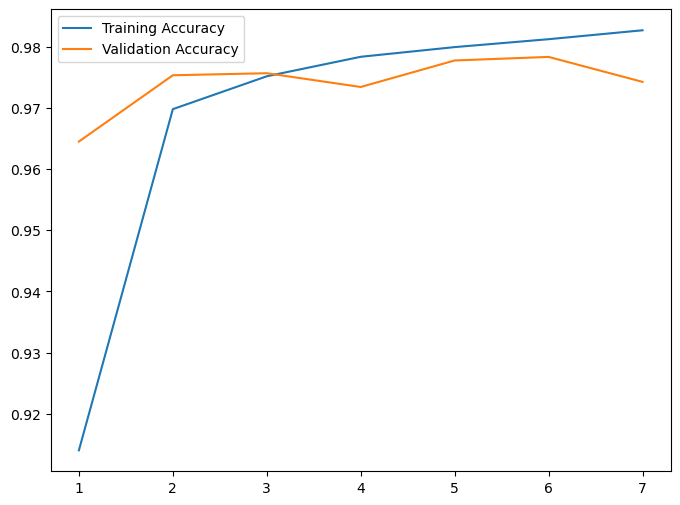

In [231]:
accuracy = lern_modeloutput.history['accuracy']
val_accuracy = lern_modeloutput.history['val_accuracy']
epoch = range(1, len(accuracy) + 1)

plt.figure(figsize=(8,6))
plt.plot(epoch, accuracy, label='Training Accuracy')
plt.plot(epoch, val_accuracy, label = 'Validation Accuracy')
plt.legend(loc = 'best')

# plt.xlabel('Epochs')
# plt.ylabel('Loss')

# #Shows the legend of the plot with the labels of the two lines.
# plt.legend()

#Shows the plot on the screen.
plt.show()

In [232]:
loss, accuracy = lern_cnn_model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.0957 - accuracy: 0.9761


In [244]:
loss, accuracy = lern_cnn_model.evaluate(x_train,y_train)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0619 - accuracy: 0.9811


### Implement the CNN Model with varying Learning Rate

The CNN model was implemented using Adam and learning rate of 0.003

In [233]:
#Using learning rate of 0.003

lerns_cnn_model = Sequential()
lerns_cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu'))
lerns_cnn_model.add(MaxPooling2D(pool_size=(2,2)))

lerns_cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu'))
lerns_cnn_model.add(MaxPooling2D(pool_size=(2,2)))

lerns_cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
lerns_cnn_model.add(MaxPooling2D(pool_size=(2,2)))


lerns_cnn_model.add(Flatten())
lerns_cnn_model.add(Dense(64,activation = 'relu'))
#model.add(Dropout(0.5))
lerns_cnn_model.add(Dense(10,activation = 'softmax'))

lerns_cnn_model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_102 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_93 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_103 (Conv2D)         (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_94 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_104 (Conv2D)         (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_95 (MaxPoolin  (None, 1, 1, 64)       

In [234]:
lerns_cnn_model.compile(optimizer=Adam(learning_rate=0.003), loss='categorical_crossentropy', metrics=['accuracy'])

In [235]:
lerns_modeloutput = lerns_cnn_model.fit(x_train,y_train, batch_size = 64, validation_split = 0.2, epochs = 7)

Epoch 1/7
750/750 [==============================] - 19s 25ms/step - loss: 0.5342 - accuracy: 0.8849 - val_loss: 0.1365 - val_accuracy: 0.9594
Epoch 2/7
750/750 [==============================] - 19s 26ms/step - loss: 0.1302 - accuracy: 0.9609 - val_loss: 0.1184 - val_accuracy: 0.9641
Epoch 3/7
750/750 [==============================] - 19s 25ms/step - loss: 0.1023 - accuracy: 0.9695 - val_loss: 0.0920 - val_accuracy: 0.9754
Epoch 4/7
750/750 [==============================] - 19s 25ms/step - loss: 0.0915 - accuracy: 0.9725 - val_loss: 0.0901 - val_accuracy: 0.9744
Epoch 5/7
750/750 [==============================] - 20s 26ms/step - loss: 0.0857 - accuracy: 0.9740 - val_loss: 0.1051 - val_accuracy: 0.9699
Epoch 6/7
750/750 [==============================] - 19s 25ms/step - loss: 0.0782 - accuracy: 0.9763 - val_loss: 0.0945 - val_accuracy: 0.9738
Epoch 7/7
750/750 [==============================] - 19s 25ms/step - loss: 0.0742 - accuracy: 0.9777 - val_loss: 0.1061 - val_accuracy: 0.9714

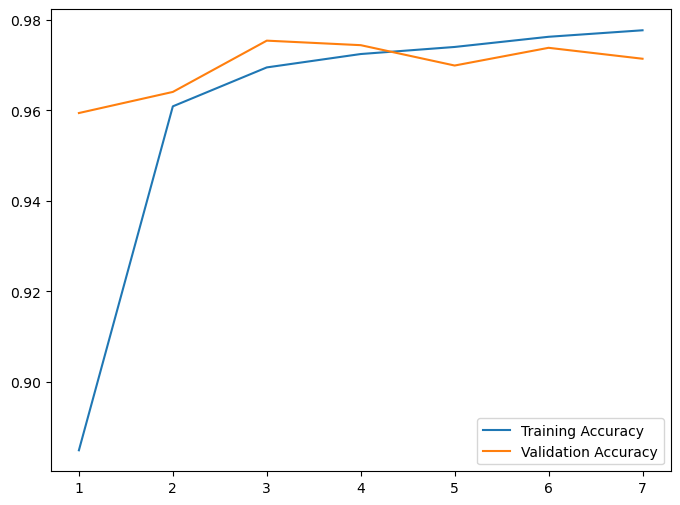

In [236]:
accuracy = lerns_modeloutput.history['accuracy']
val_accuracy = lerns_modeloutput.history['val_accuracy']
epoch = range(1, len(accuracy) + 1)

plt.figure(figsize=(8,6))
plt.plot(epoch, accuracy, label='Training Accuracy')
plt.plot(epoch, val_accuracy, label = 'Validation Accuracy')
plt.legend(loc = 'best')

# plt.xlabel('Epochs')
# plt.ylabel('Loss')

# #Shows the legend of the plot with the labels of the two lines.
# plt.legend()

#Shows the plot on the screen.
plt.show()

In [237]:
loss, accuracy = lerns_cnn_model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1146 - accuracy: 0.9715


In [242]:
loss, accuracy = lerns_cnn_model.evaluate(x_train,y_train)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0771 - accuracy: 0.9776
